<a href="https://colab.research.google.com/github/samiha-mahin/Dhaka_Apartment_Price_Prediction_ML/blob/main/Dhaka_Apartment_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df1 = pd.read_csv('/content/Dhaka_Apartment_Dataset.csv')
df2 = pd.read_csv('/content/bproperty_data.csv')

In [3]:
df2.head()

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


In [4]:
len(df2['Region'].unique())

69

In [5]:
df3 = df2[['Price', 'Type', 'No. Beds', 'No. Baths', 'Area', 'Region']]
df3.head(1)

,Price,Type,No. Beds,No. Baths,Area,Region
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [6]:
df4 = df3.rename(columns={
    'No. Beds': 'Bed',
    'No. Baths': 'Bath',
    'Area' : 'Size',
    'Region': 'Location'
})
df4.head(1)

,Price,Type,Bed,Bath,Size,Location
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [7]:
df5 = df4.iloc[:,[0,1,4,2,3,5]]
df5.head(1)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [8]:
df5.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,float64
Bath,float64
Location,object


In [9]:
df5.isnull().sum()

,0
Price,0
Type,0
Size,0
Bed,204
Bath,204
Location,0


In [10]:
df6 = df5.dropna()
df6.head(1)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [11]:
df6.isnull().sum()

,0
Price,0
Type,0
Size,0
Bed,0
Bath,0
Location,0


In [12]:
df6.head()

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara
1,7280000,Apartment,1456.0,4.0,4.0,Mirpur
2,13000000,Apartment,1550.0,3.0,3.0,Khilgaon
3,37000000,Apartment,2669.0,3.0,3.0,Banani
4,3600000,Apartment,835.0,2.0,2.0,Banasree


In [13]:
df6.Bed = df6.Bed.astype(int)
df6.Bath = df6.Bath.astype(int)

<ipython-input-13-107915bdff34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Bed = df6.Bed.astype(int)
<ipython-input-13-107915bdff34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Bath = df6.Bath.astype(int)


In [14]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [15]:
df6.head()

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur
2,13000000,Apartment,1550.0,3,3,Khilgaon
3,37000000,Apartment,2669.0,3,3,Banani
4,3600000,Apartment,835.0,2,2,Banasree


In [16]:
df6.shape

(4500, 6)

In [17]:
df1.head(1)

,Unnamed: 0,price,size_in_sqf,number_of_bath,number_of_bed,full_location,location_area,purpose_of_listing,type_of_listing,completion_status
0,0,19000000.0,2350.0,4,3,"Block B, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready


In [18]:
df7 = df1[['price' , 'size_in_sqf', 'number_of_bath','number_of_bed','location_area','type_of_listing']]
df7.head(1)

,price,size_in_sqf,number_of_bath,number_of_bed,location_area,type_of_listing
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [19]:
df8 = df7.rename(columns={
    'price': 'Price',
    'size_in_sqf': 'Size',
    'number_of_bath': 'Bath',
    'number_of_bed': 'Bed',
    'location_area': 'Location',
    'type_of_listing': 'Type'
})
df8.head(1)

,Price,Size,Bath,Bed,Location,Type
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [20]:
df9 =df8.iloc[:,[0,5,1,3,2,4]]
df9.head()

,Price,Type,Size,Bed,Bath,Location
0,19000000.0,Apartment,2350.0,3,4,Bashundhara R-A
1,33000000.0,Apartment,2294.0,3,4,Gulshan
2,13500000.0,Apartment,1745.0,3,3,Bashundhara R-A
3,5300000.0,Apartment,1080.0,3,2,Hazaribag
4,25000000.0,Apartment,1920.0,3,3,Banani


In [21]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [22]:
df9.dtypes

,0
Price,float64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [23]:
df9.Price = df9.Price.astype(int)
df9.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [24]:
df10 = pd.concat([df6,df9],axis = 0)
df10.head()

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur
2,13000000,Apartment,1550.0,3,3,Khilgaon
3,37000000,Apartment,2669.0,3,3,Banani
4,3600000,Apartment,835.0,2,2,Banasree


In [25]:
df10.shape

(15080, 6)

In [26]:
df10.to_csv('final_data.csv')

In [28]:
df11 = pd.read_csv('/content/final_data.csv')
df11.head()

,Unnamed: 0,Price,Type,Size,Bed,Bath,Location
0,0,7500000,Apartment,1300.0,3,3,Uttara
1,1,7280000,Apartment,1456.0,4,4,Mirpur
2,2,13000000,Apartment,1550.0,3,3,Khilgaon
3,3,37000000,Apartment,2669.0,3,3,Banani
4,4,3600000,Apartment,835.0,2,2,Banasree


In [29]:
df11['Price_per_sqf'] = (df11.Price/df11.Size).astype(int)
df11.head()

,Unnamed: 0,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,0,7500000,Apartment,1300.0,3,3,Uttara,5769
1,1,7280000,Apartment,1456.0,4,4,Mirpur,5000
2,2,13000000,Apartment,1550.0,3,3,Khilgaon,8387
3,3,37000000,Apartment,2669.0,3,3,Banani,13862
4,4,3600000,Apartment,835.0,2,2,Banasree,4311


In [30]:
df11.Type.value_counts()

,count
Type,
Apartment,14871
Building,153
Duplex,55
Plot,1


In [31]:
df12 = df11[df11.Type == 'Apartment']
df12.Type.value_counts()

,count
Type,
Apartment,14871


In [33]:
print(df12.Price_per_sqf.median())
print(df12.Price_per_sqf.mean())
print(df12.Price_per_sqf.std())
print(df12.Price_per_sqf.max())
print(df12.Price_per_sqf.min())

5581.0
6280.627126622285
2639.1609520760458
30000
416


In [34]:
info = df12.copy()
info.head(1)

,Unnamed: 0,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,0,7500000,Apartment,1300.0,3,3,Uttara,5769


In [36]:
info.groupby('Location').Price_per_sqf.mean().sort_values(ascending=False)

,Price_per_sqf
Location,
Banani DOHS,16804.761905
Gulshan,16234.144279
BananiDOHS,15932.500000
MohakhaliDOHS,14779.000000
Mohakhali DOHS,13914.888889
...,...
Demra,3820.000000
UttarKhan,3680.500000
Savar,3529.826923


In [37]:
len(df12.Location.unique())

80

In [38]:
df12.Location = df12.Location.str.replace(" ","")

<ipython-input-38-cf1894fb8bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12.Location = df12.Location.str.replace(" ","")


In [41]:
len(df12.Location.unique())

69

In [42]:
info = df12.copy()
info.head(1)

,Unnamed: 0,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,0,7500000,Apartment,1300.0,3,3,Uttara,5769


In [43]:
info.groupby('Location').Price_per_sqf.mean().sort_values(ascending=False)

,Price_per_sqf
Location,
BananiDOHS,16728.913043
Gulshan,16234.144279
MohakhaliDOHS,14038.333333
Banani,13421.452555
Baridhara,12923.547945
...,...
Shyampur,3826.773723
Demra,3820.000000
Savar,3529.826923


<ipython-input-48-779b1098a2e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top5, x = 'Location' ,y= 'mean', palette='PuBu')


<Axes: xlabel='Location', ylabel='mean'>

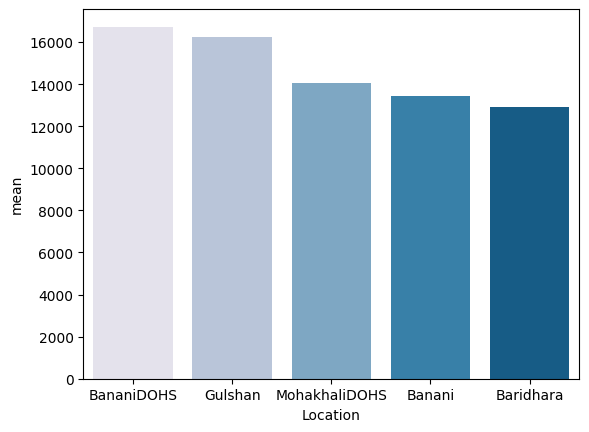

In [48]:
top5 = info.groupby('Location').Price_per_sqf.agg(['mean','max','median','min']).sort_values(by='mean',ascending=False).head(5)
sns.barplot(data= top5, x = 'Location' ,y= 'mean', palette='PuBu')